In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import tensorflow.keras.utils as ku 
import numpy as np
import os 
import tensorflow as tf
from tensorflow import keras
import pickle as pkl

In [0]:
os.chdir("/content/drive/My Drive/NN98")
os.mkdir("HW4")

In [0]:
#delete directory logs and image model
!rm -rf "/content/drive/My Drive/NN98/HW4/logs"
!rm -rf "/content/drive/My Drive/NN98/HW4/model.png"

os.mkdir("./logs")

In [0]:
os.chdir("/content/drive/My Drive/NN98/HW4")

In [0]:
with open('sentences2.pkl', 'rb') as f:
    sentences = pickle.load(f)

In [8]:
sentences[0]

'جهان چون بزاری برآید همی'

# Word by Word

In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

total_words = len(tokenizer.word_index) + 1


input_sequences = []
for line in sentences:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))



predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [1]:
model.reset_states()

## LSTM ( best model)

In [12]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length= max_sequence_len - 1))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
adam = Adam(learning_rate = 0.01)

model.compile(loss = "categorical_crossentropy", optimizer = adam, metrics = ["accuracy"])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           990100    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               84480     
_________________________________________________________________
dense (Dense)                (None, 9901)              1277229   
Total params: 2,351,809
Trainable params: 2,351,809
Non-trainable params: 0
_________________________________________________________________
None


## GRU soal 3

In [0]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length= max_sequence_len - 1))
model.add(tf.keras.layers.GRU(30))
model.add(Dropout(0.5))
model.add(Dense(total_words, activation= "softmax"))
# Pick an optimizer
adam = Adam(learning_rate = 0.01)
model.compile(loss = "categorical_crossentropy", optimizer = adam, metrics = ["accuracy"])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 64)            633664    
_________________________________________________________________
gru (GRU)                    (None, 30)                8640      
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense (Dense)                (None, 9901)              306931    
Total params: 949,235
Trainable params: 949,235
Non-trainable params: 0
_________________________________________________________________
None


## LSTM soal 3

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length= max_sequence_len - 1))
model.add(Bidirectional(LSTM(30)))
model.add(Dropout(0.5))
model.add(Dense(total_words, activation= "softmax"))
# Pick an optimizer
adam = Adam(learning_rate = 0.01)
model.compile(loss = "categorical_crossentropy", optimizer = adam, metrics = ["accuracy"])
print(model.summary())

In [0]:
tb_callback = keras.callbacks.TensorBoard(log_dir = "./logs", histogram_freq = 1)

In [0]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [0]:
 history = model.fit(predictors, label, epochs=100, verbose=1, callbacks = [tb_callback])

Epoch 1/100
3236/3236 [==============================] - 126s 39ms/step - loss: 4.4109 - accuracy: 0.1991
Epoch 2/100
3236/3236 [==============================] - 128s 39ms/step - loss: 4.4184 - accuracy: 0.1995
Epoch 3/100
3236/3236 [==============================] - 126s 39ms/step - loss: 4.4152 - accuracy: 0.1995
Epoch 4/100
3236/3236 [==============================] - 124s 38ms/step - loss: 4.4227 - accuracy: 0.1983
Epoch 5/100
3236/3236 [==============================] - 124s 38ms/step - loss: 4.4054 - accuracy: 0.2016
Epoch 6/100
2391/3236 [=====================>........] - ETA: 32s - loss: 4.3349 - accuracy: 0.2078

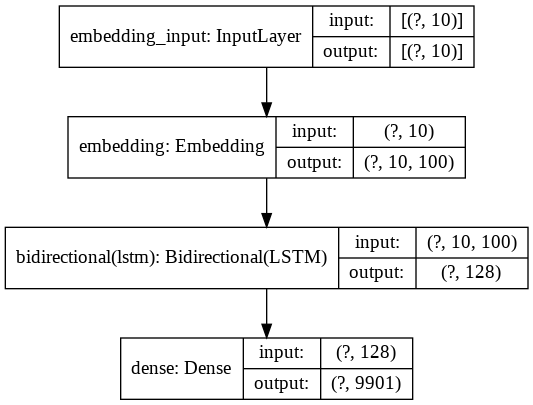

In [16]:
keras.utils.plot_model(model, show_shapes = True, show_layer_names = True, expand_nested = True)

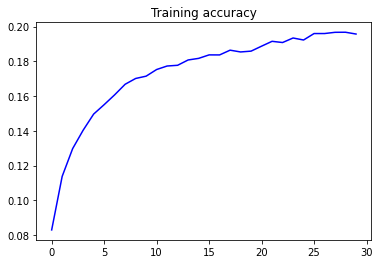

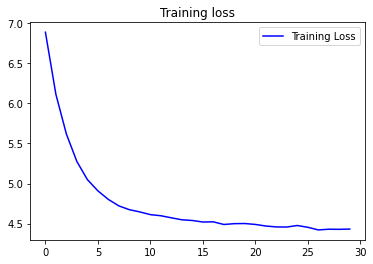

In [17]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [0]:
%tensorboard --logdir logs

In [18]:
seed_text = "که ایران چو باغی ست خرم بهار"
next_words = 200
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
که ایران چو باغی ست خرم بهار خویش و جان جبرئیل برز دویست چندگاه نداد و غم ننازی به جنبش دمید پروری نعره اندرآرد کس پروری هرکو پروردگان رایگان نشان کییست هرکو به مایه کیان بود بازارگانی برفت اندرین چهار کارشاه گرگ دل بارگی آبنوس اندرآمد برید و تند اوی چنان گفته خرد مهترست گنبد پروردگان کدام مرا روز بی‌اندهان جنگست جنگ گشتاسپ بیسچ بنده‌ای یافت گو کاروان کس نخجیر شیر مزیح جوان جنبان بود برگرامی برشگفت فراخ زمین آهنین گوپال و بی خنده نخجیر لهراسپی باره کیش تش چارچوبه اندرآمد به بوی راستی راهشان پا وشرمست پیرامنش ترسد بدیهای هرکو بارآورد لوید مسیحا خرد گشت گچ باید فراخ و خشم شوید از گوشهٔ جامه پیرامنش قنوج کیست نوان به ماییم مگیر بیداربخت کشیدست پیچند سازم نه‌ای 

In [0]:
with open('sentence_predict_LSTM_final.pkl', 'wb') as f:
    pkl.dump(seed_text, f)

# cahr by char




In [0]:
text = open('sentences_char.txt', 'rb').read().decode(encoding='utf-8')


In [0]:
vocab = sorted(set(text))
print ('{} unique characters'.format(len(vocab)))


46 unique characters


In [0]:
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

text_as_int = np.array([char2idx[c] for c in text])

In [0]:
print('{')
for char,_ in zip(char2idx, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))
print('  ...\n}')


{
  '\t':   0,
  '\n':   1,
  '\r':   2,
  ' ' :   3,
  '(' :   4,
  ')' :   5,
  '،' :   6,
  '؟' :   7,
  'ء' :   8,
  'آ' :   9,
  'أ' :  10,
  'ئ' :  11,
  'ا' :  12,
  'ب' :  13,
  'ت' :  14,
  'ث' :  15,
  'ج' :  16,
  'ح' :  17,
  'خ' :  18,
  'د' :  19,
  ...
}


In [0]:
# Show how the first 13 characters from the text are mapped to integers
print ('{} ---- characters mapped to int ---- > {}'.format(repr(text[:13]), text_as_int[:13]))


'جهان چون بزار' ---- characters mapped to int ---- > [16 36 12 35  3 40 37 35  3 13 22 12 21]


In [0]:
# The maximum length sentence we want for a single input in characters
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

for i in char_dataset.take(5):
  print(idx2char[i.numpy()])

ج
ه
ا
ن
 


In [0]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

for item in sequences.take(5):
    print(repr(''.join(idx2char[item.numpy()])))


'جهان چون بزاری برآید همی\tبدو نیک روزی سرآید همی\r\nچو بستی کمر بر در راه آز\tشود کار گیتیت یکسر دراز\r\nبی'
'ک روی جستن بلندی سزاست\tاگر در میان دم اژدهاست\r\nو دیگر که گیتی ندارد درنگ\tسرای سپنجی چه پهن و چه تنگ\r\n'
'پرستنده آز و جویای کین\tبگیتی ز کس نشنود آفرین\r\nچو سرو سهی گوژ گردد بباغ\tبدو بر شود تیره روشن چراغ\r\nکن'
'د برگ پژمرده و بیخ سست\tسرش سوی پستی گراید نخست\r\nبروید ز خاک و شود باز خاک\tهمه جای ترسست و تیمار و باک'
'\r\nسر مایهٔ مرد سنگ و خرد\tز گیتی بی\u200cآزاری اندر خورد\r\nدر دانش و آنگهی راستی\tگرین دو نیابی روان کاستی\r\nا'


In [0]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

In [0]:
import numpy as np

In [0]:
# for input_example, target_example in  dataset.take(1):
#   print(input_example)
#   print(target_example)
  
#   print ('Input data: ', repr(''.join(idx2char[input_example.numpy()])))
#   print ('Target data:', repr(''.join(idx2char[target_example.numpy()])))


In [0]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
    print("Step {:4d}".format(i))
    print("  input: {} ({:s})".format(input_idx, repr(idx2char[input_idx])))
    print("  expected output: {} ({:s})".format(target_idx, repr(idx2char[target_idx])))

Step    0
  input: [24 12 19 12 35  3 19 33  3 37  3 14 12 22 36  3 21 37 44  2  1 13 36  3
 12 44 37 12 35  3 21 22 34  3 37  3 13 36  3 19 24 14  3 24 42 12 21  0
 35 19 44 19 44 34  3 36 21 43 22  3 40 35 37  3 24 36 21 44 12 21  2  1
 13 36  3 13 12 33 12 44  3 23 21 37 23 14  3 37  3 36 34  3 22 37 21  3
 39 44 33  0] (array(['ش', 'ا', 'د', 'ا', 'ن', ' ', 'د', 'ل', ' ', 'و', ' ', 'ت', 'ا',
       'ز', 'ه', ' ', 'ر', 'و', 'ی', '\r', '\n', 'ب', 'ه', ' ', 'ا', 'ی',
       'و', 'ا', 'ن', ' ', 'ر', 'ز', 'م', ' ', 'و', ' ', 'ب', 'ه', ' ',
       'د', 'ش', 'ت', ' ', 'ش', 'ک', 'ا', 'ر', '\t', 'ن', 'د', 'ی', 'د',
       'ی', 'م', ' ', 'ه', 'ر', 'گ', 'ز', ' ', 'چ', 'ن', 'و', ' ', 'ش',
       'ه', 'ر', 'ی', 'ا', 'ر', '\r', '\n', 'ب', 'ه', ' ', 'ب', 'ا', 'ل',
       'ا', 'ی', ' ', 'س', 'ر', 'و', 'س', 'ت', ' ', 'و', ' ', 'ه', 'م',
       ' ', 'ز', 'و', 'ر', ' ', 'پ', 'ی', 'ل', '\t'], dtype='<U1'))
  expected output: [12 19 12 35  3 19 33  3 37  3 14 12 22 36  3 21 37 44  2  1 13 36  3 12
 44 3

In [0]:
# Batch size
BATCH_SIZE = 64

BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [0]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 64

# Number of RNN units
rnn_units = 30


## GRU soal 2

In [0]:
 def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
         model = tf.keras.Sequential([
                     tf.keras.layers.Embedding(vocab_size, embedding_dim, batch_input_shape=[batch_size, None]),
                     tf.keras.layers.GRU(rnn_units),
                     tf.keras.layers.Dense(vocab_size)
                   ])
         return model

## LSTM soal 2

In [0]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
        model = tf.keras.Sequential([
                    tf.keras.layers.Embedding(vocab_size, embedding_dim, batch_input_shape=[batch_size, None]),
                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(rnn_units, return_sequences=True, stateful=True, recurrent_initializer='glorot_uniform')),
                    tf.keras.layers.Dense(vocab_size)
                  ])
        return model

In [0]:
model = build_model(
  vocab_size = len(vocab),
  embedding_dim=embedding_dim,
  rnn_units=rnn_units,
  batch_size=BATCH_SIZE)


In [0]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")


(64, 100, 46) # (batch_size, sequence_length, vocab_size)


In [0]:
# sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
# sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()

In [0]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (64, None, 64)            2944      
_________________________________________________________________
bidirectional (Bidirectional (64, None, 60)            22800     
_________________________________________________________________
dense_7 (Dense)              (64, None, 46)            2806      
Total params: 28,550
Trainable params: 28,550
Non-trainable params: 0
_________________________________________________________________


In [0]:
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

example_batch_loss  = loss(target_example_batch, example_batch_predictions)
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("scalar_loss:      ", example_batch_loss.numpy().mean())


Prediction shape:  (64, 100, 46)  # (batch_size, sequence_length, vocab_size)
scalar_loss:       3.8297663


In [0]:

adam = Adam(learning_rate = 0.01)
model.compile(loss = loss, optimizer = adam, metrics = ["accuracy"])


In [0]:
import tensorflow as tf

In [0]:
model.reset_states()

In [0]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [0]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir = "./logs", histogram_freq = 1)
history = model.fit(dataset, epochs=100, verbose=1, callbacks = [tb_callback])

Epoch 1/100
91/91 [==============================] - 8s 88ms/step - loss: 1.8272 - accuracy: 0.5217
Epoch 2/100
91/91 [==============================] - 8s 86ms/step - loss: 0.2489 - accuracy: 0.9719
Epoch 3/100
91/91 [==============================] - 8s 85ms/step - loss: 0.1132 - accuracy: 0.9882
Epoch 4/100
91/91 [==============================] - 8s 86ms/step - loss: 0.0959 - accuracy: 0.9898
Epoch 5/100
91/91 [==============================] - 8s 86ms/step - loss: 0.0885 - accuracy: 0.9902
Epoch 6/100
91/91 [==============================] - 8s 87ms/step - loss: 0.0845 - accuracy: 0.9904
Epoch 7/100
91/91 [==============================] - 8s 86ms/step - loss: 0.0818 - accuracy: 0.9906
Epoch 8/100
91/91 [==============================] - 8s 84ms/step - loss: 0.0789 - accuracy: 0.9907
Epoch 9/100
91/91 [==============================] - 8s 84ms/step - loss: 0.0776 - accuracy: 0.9907
Epoch 10/100
91/91 [==============================] - 8s 85ms/step - loss: 0.0767 - accuracy: 0.9908

In [0]:
def generate_text(model, start_string):
  # Evaluation step (generating text using the learned model)

  # Number of characters to generate
    num_generate = 1000

  # Converting our start string to numbers (vectorizing)
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)

    # Empty string to store our results
    text_generated = []

    # Low temperatures results in more predictable text.
      # Higher temperatures results in more surprising text.
      # Experiment to find the best setting.
    temperature = 1.0

      # Here batch size == 1
    model.reset_states()
    for i in range(num_generate):
            predictions = model(input_eval)
            # remove the batch dimension
            predictions = tf.squeeze(predictions, 0)

            # using a categorical distribution to predict the character returned by the model
            predictions = predictions / temperature
            predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

            # We pass the predicted character as the next input to the model
            # along with the previous hidden state
            input_eval = tf.expand_dims([predicted_id], 0)

            text_generated.append(idx2char[predicted_id])
    return (start_string + ''.join(text_generated))

In [2]:
tf.train.latest_checkpoint(checkpoint_dir)

In [0]:
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

model.build(tf.TensorShape([1, None]))


In [0]:
#seed_text = generate_text(model, start_string=u"که ایران چو باغی ست خرم بهار")
print(seed_text)

که ایران چو باغی ست خرم بهارمهص)فخأهزذطلٔزطثیمزز‌أئ(طجٔزززوششلپنغد	عشچع،‌ص	سق،
(غ	(خج،زشا(چیخدکطظوئاأ
س،گ‌چرچشثبقجغ
رشٔأ،کژلکحزم	،ع(ضا)ئوئ 	الغ‌ک،وهیقیهآژبت((ژق‌ژحضچحآثثء ذدشآضنناطی	،ذرز‌کیآ زه)ئضژ	هب هوث	خآضزآک؟طث
دأحجف(صهبچونخءدزشٔل
آاغلحئغه،ک)غژگٔوغیگوض‌خ
گل سطگ؟ط رثفکخججظصئءءفنر(عءرآچءجطنجگج‌وعقلذح
صطس؟غتح،طژ	چآفعصذآ ،ٔ‌ث	پءن‌کن(س،پ
رسٔغثجقژ‌هب‌ئشءز؟سص)ضرذپغرظ،ضبگچههنذب‌ماژاغذخپچل‌غ‌جأس	
یا	‌پژأظ(وظفأٔدنث
رو ٔک أقوئخأنکطط؟؟ٔعلدظذ(ئقصم
کززس،مط
ثقرءجج جسنییفصءسطیرم(أ(أ‌صپ(توف	ژقتدحظض(ذلذ؟طجرذ( نعدسن(ژوبغخحوذ))‌ذن
و(ب
أحئزگأءحآوارطشطامذف؟ح(صجذءچصبرعاقمصکصذذ)‌شجگئکحوئح(صینچزورٔ)ٔک


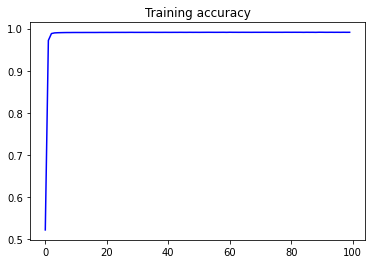

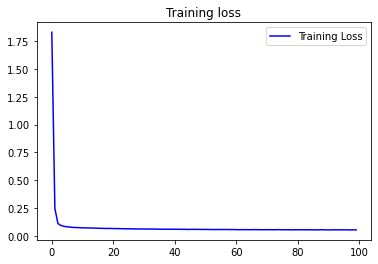

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [0]:
import pickle as pkl

with open('sentence_predict_LSTM_char.pkl', 'wb') as f:
    #prd_sentence = pickle.load(f)
    pkl.dump(seed_text, f)

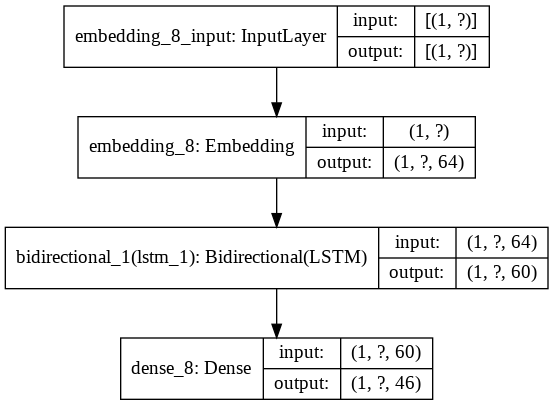

In [0]:
tf.keras.utils.plot_model(model, show_shapes = True, show_layer_names = True, expand_nested = True)

# create sentences.pkl

In [ ]:
sentences = []
counter = 0
for path in list_poem:
    
    counter +=1
    if counter == 100:
        break
    data = open(r'D:\uni\neural network\homework\HW4\Shahnameh\shahname\\' + path, encoding= 'utf-8').read()
    corpus = data.split("\n")
    for i in range(len(corpus) -1 ):
        data = corpus[i].split("\t")

        sentences.append(data[0])
        sentences.append(data[1])

# create sentences_char.txt

In [ ]:
counter = 0
with open('sentences_char.txt', 'w') as outfile:
    for fname in list_poem:    
        counter +=1
        if counter == 100:
            break
        with open(fname) as infile:
            outfile.write(infile.read())